In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cupy Available= 1


# DCT vs FFT

In [ ]:
dataset="synthetic"
denoiser="noise2void"

In [ ]:
editor = Editor()
zoom = 1
editor.compose(
    [
        {
            "Raw": f"best/{dataset}/x.mp4",
            "GroundTruth": f"best/{dataset}/gt.mp4",
        },
        {
            "Noise2Void": f"best/{dataset}/n2v_y_32.mp4",
            "FFT": f"best/{dataset}/fft_n2v_y_32.mp4",
        },
    ],
    f"{dataset}_{denoiser}_{zoom}x.mp4",
    codec="libx265",
    bitrate=5000,
    duration=20,
    speed=1,
    zoom=zoom,
)

### 🎥 See [`dct_vs_fft.mp4`](dct_vs_fft.mp4)

## PSNR3D vs SSIM3D

### DCT vs FFT

In [13]:
def plot(df, height=6):
    _, ax1 = plt.subplots(figsize=(12, height))

    # plot PSNR
    df["PSNR (dB)"].plot(kind="barh", ax=ax1, color="tab:blue", position=1, width=0.3, label="PSNR (dB)")
    ax1.set_xlim(25, 35)
    ax1.set_xticks(range(25, 36, 1))
    ax1.set_xlabel("PSNR (dB)")

    ax2 = ax1.twiny()
    df["SSIM3D"].plot(kind="barh", ax=ax2, color="tab:orange", position=0, width=0.3, label="SSIM3D")
    ax2.set_xlim(0, 1)
    ax2.set_xticks([_ / 10 for _ in range(0, 11)])
    ax2.set_xlabel("SSIM3D")

    ax1.set_yticks(range(len(df)))
    ax1.set_yticklabels(df.index)
    ax1.set_title("Comparison of Denoising Methods")

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="lower right")

    plt.tight_layout()
    plt.show()

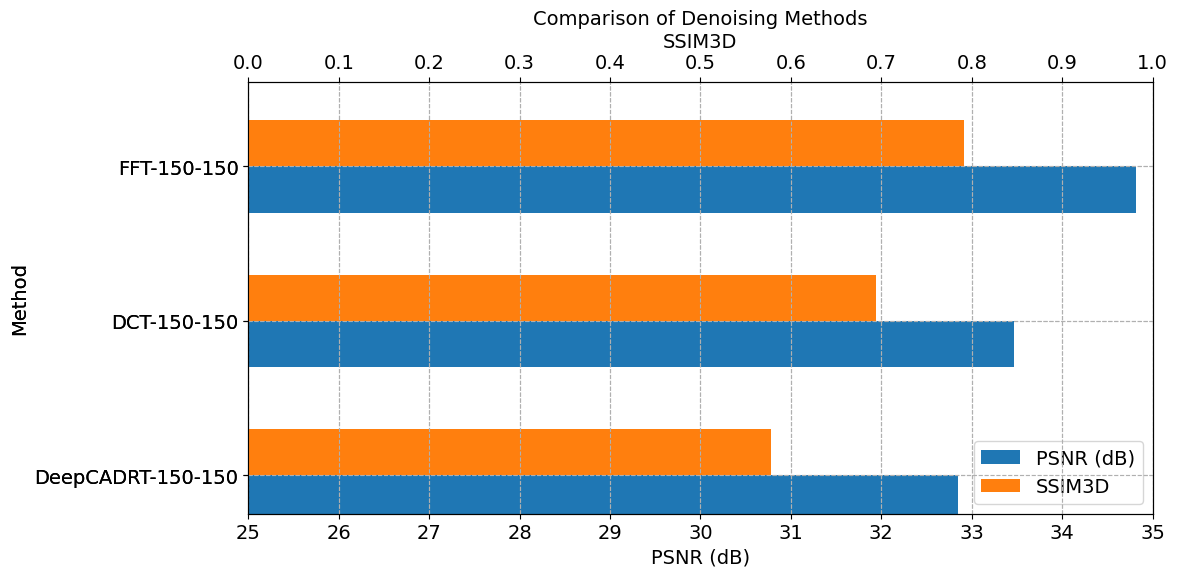

In [14]:
# DCT is frame3000_win6000_s036_δs72_t0
# FFT is frame3000_alphas0.85
df = pd.DataFrame(
    [
        ("DeepCADRT-150-150", 32.8495724, 0.578202),
        ("DCT-150-150", 33.471270, 0.69420),
        ("FFT-150-150", 34.814267, 0.791301),
    ],
    columns=["Method", "PSNR (dB)", "SSIM3D"],
).set_index("Method")
plot(df)

## DeepCAD vs FFT

In [7]:
def barchart(baseline_df, df, width=0.75):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

    # PSNR comparison
    axes[0].bar(baseline_df.index, baseline_df["PSNR"], label="DeepCAD", color="lightgray", width=width)
    axes[0].bar(
        df.index,
        df["PSNR"] - baseline_df["PSNR"],
        bottom=baseline_df["PSNR"],
        label="FFT",
        color="steelblue",
        width=width,
    )
    axes[0].set_ylim((25,36))
    axes[0].set_title("PSNR Comparison")
    axes[0].set_xlabel("Method")
    axes[0].set_ylabel("PSNR")
    axes[0].legend()

    # SSIM3D comparison
    axes[1].bar(baseline_df.index, baseline_df["SSIM3D"], label="DeepCAD", color="lightgray", width=width)
    axes[1].bar(
        df.index,
        df["SSIM3D"] - baseline_df["SSIM3D"],
        bottom=baseline_df["SSIM3D"],
        label="FFT",
        color="steelblue",
        width=width,
    )
    axes[1].set_ylim((0.7,1))
    axes[1].set_title("SSIM3D Comparison")
    axes[1].set_xlabel("Method")
    axes[1].set_ylabel("SSIM3D")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

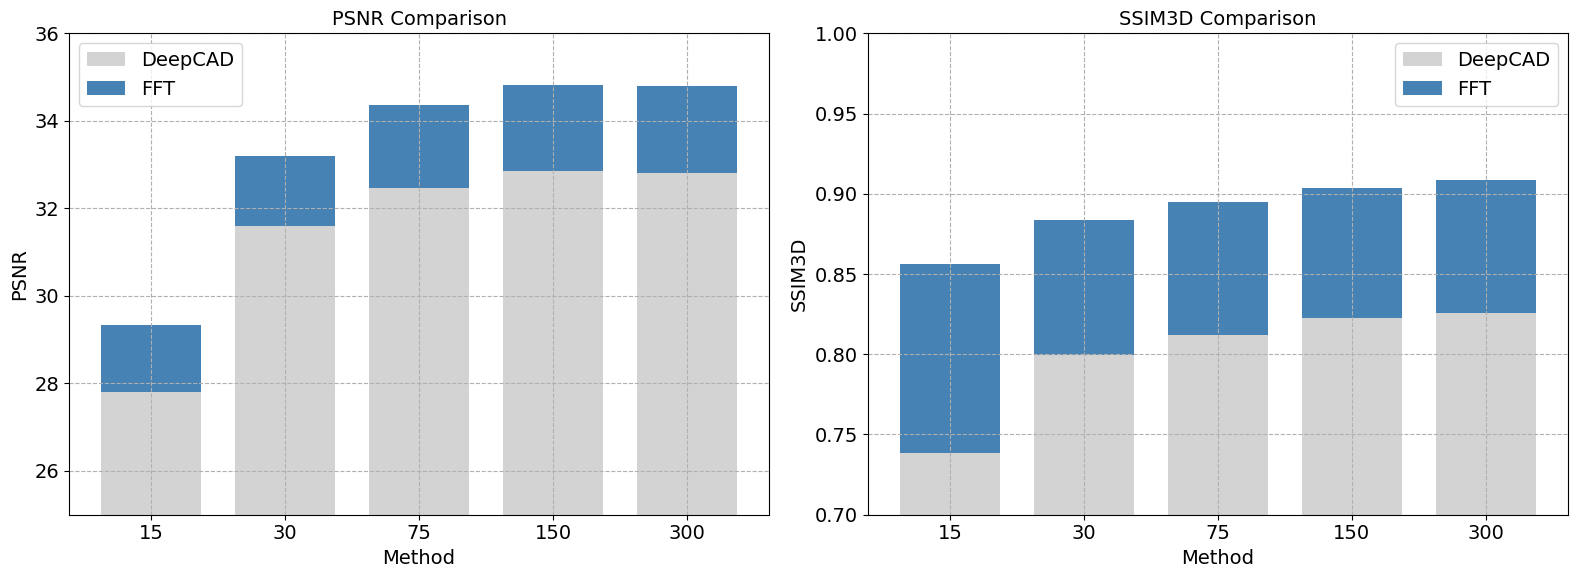

In [8]:
# ("DeepCADRT-300-150",32.7138, 0.5753220)
# ("FFT-300-150",34.64649, 0.793504)

# FFT is frame3000_alphas0.85
deepcad_df = pd.DataFrame(
    [
        ("15", 27.804, 0.7383),
        ("30", 31.6045103904, 0.79947),
        ("75", 32.4733731, 0.811954081058),
        ("150", 32.8495724, 0.822667),
        ("300", 32.814922, 0.82571),
    ],
    columns=["Method", "PSNR", "SSIM3D"],
).set_index("Method")
fft_df = pd.DataFrame(
    [
        ("15", 29.33049, 0.8564),
        ("30", 33.19490866, 0.883750),
        ("75", 34.36992956, 0.89477),
        ("150", 34.814267, 0.90370),
        ("300", 34.807489, 0.9085329),
    ],
    columns=["Method", "PSNR", "SSIM3D"],
).set_index("Method")
barchart(deepcad_df, fft_df, width=0.75)
# plot(deepcad_df, fft_df)